#AI-powered personalized health and fitness assistant
#Body Fat Prediction

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
     

In [4]:
df=pd.read_csv('bodyfat.csv')

In [5]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
df.shape

(252, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


#Missing Value Analysis

In [9]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

<Axes: title={'center': 'Missing Values Per Feature'}>

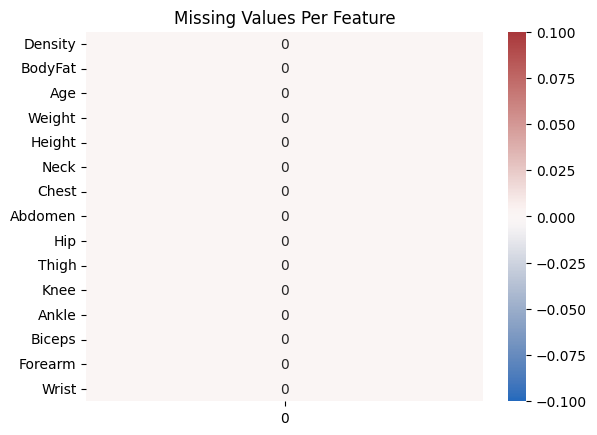

In [10]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [11]:
df.duplicated().sum()

0



*   It is evident that there are no missing and duplicate values





#Outliers Analysis

In [12]:
def detect_outliers_iqr(data):
    outliers = []
    #data = sorted(data)
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    #print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound, upr_bound)
    for i in data: 
        if (iupr_bound):
            outliers.append(i)
            #print(i)
    return outliers

In [13]:
columns = ['Density','BodyFat','Age','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']

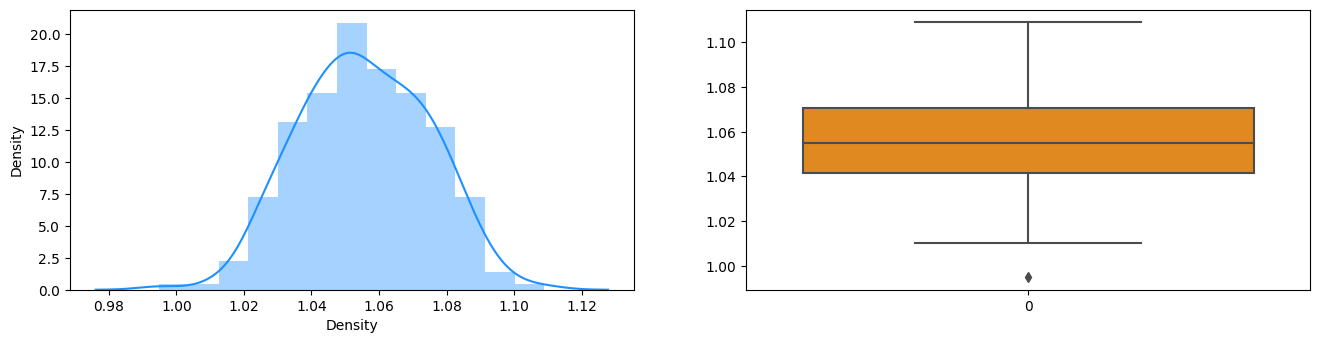

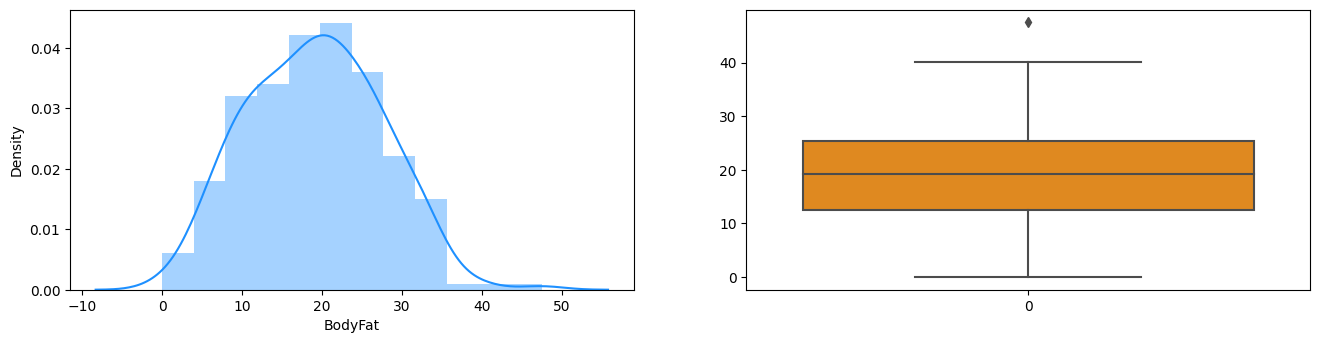

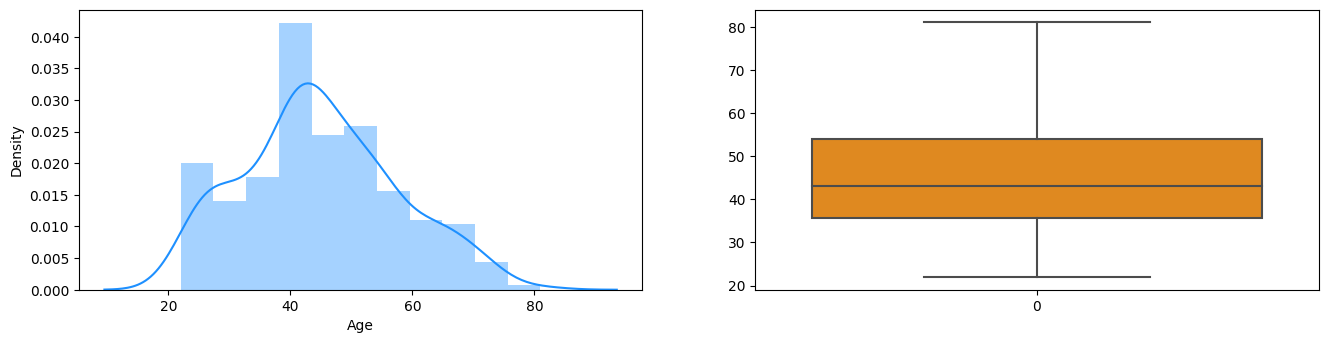

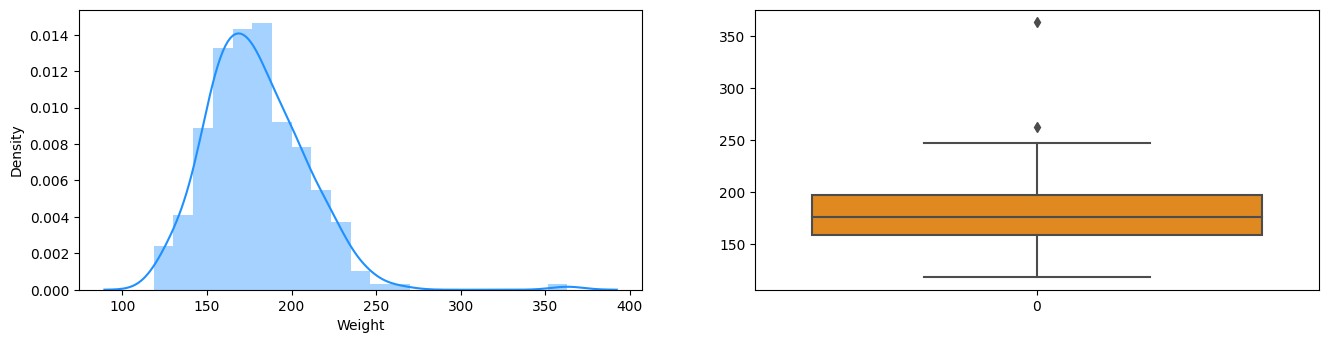

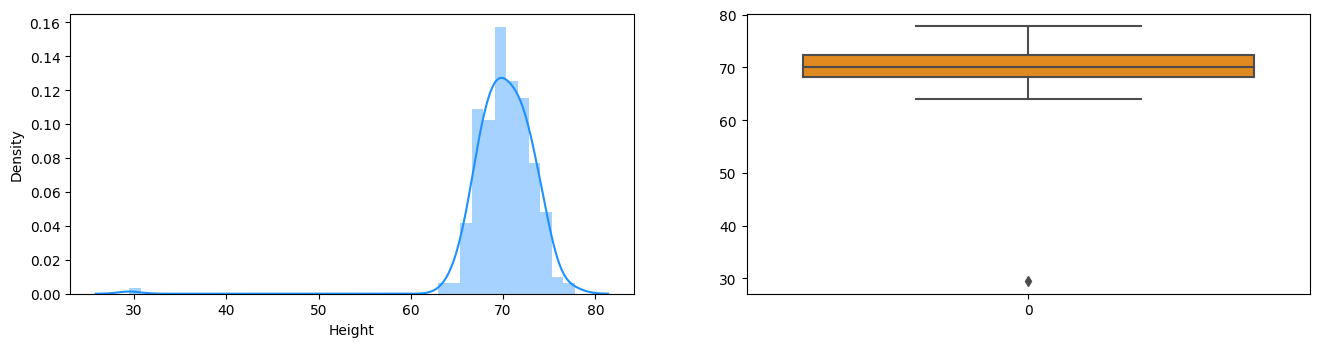

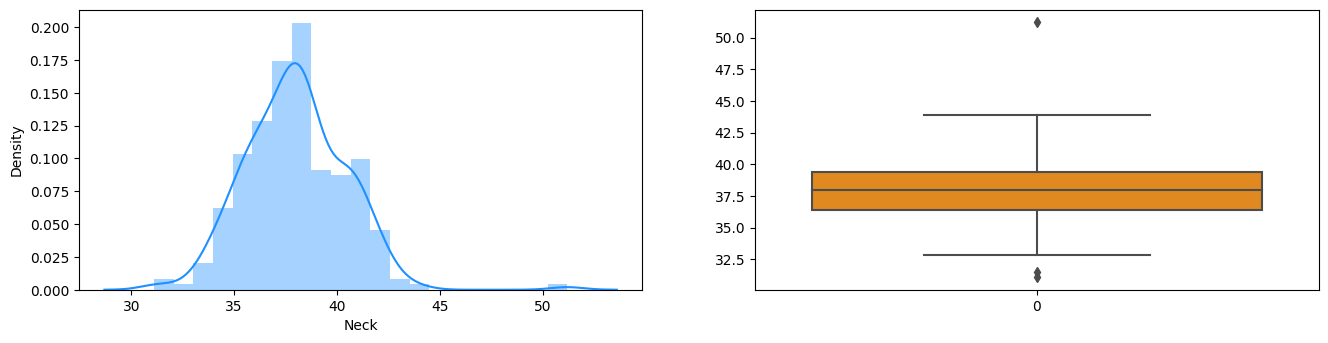

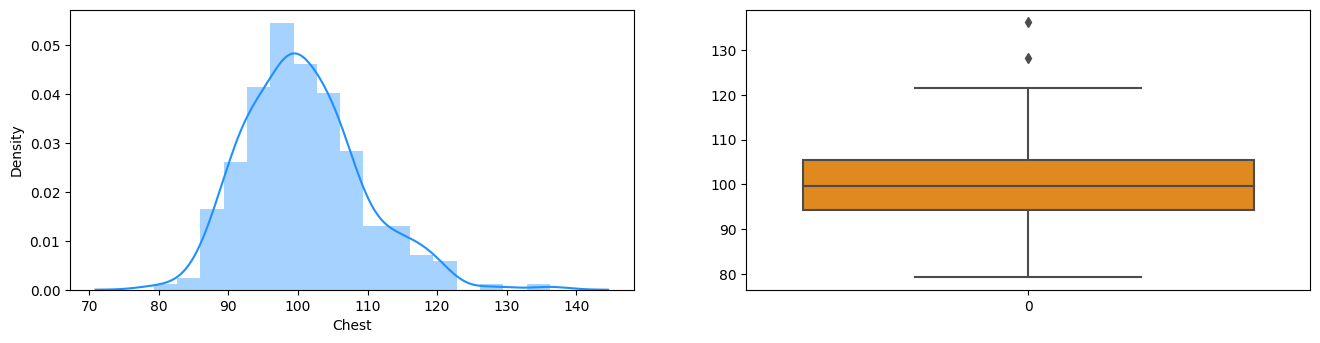

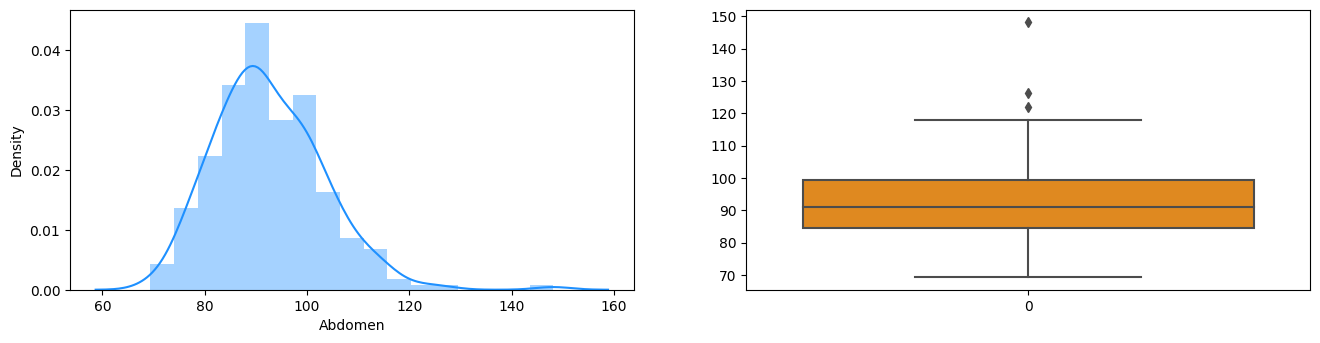

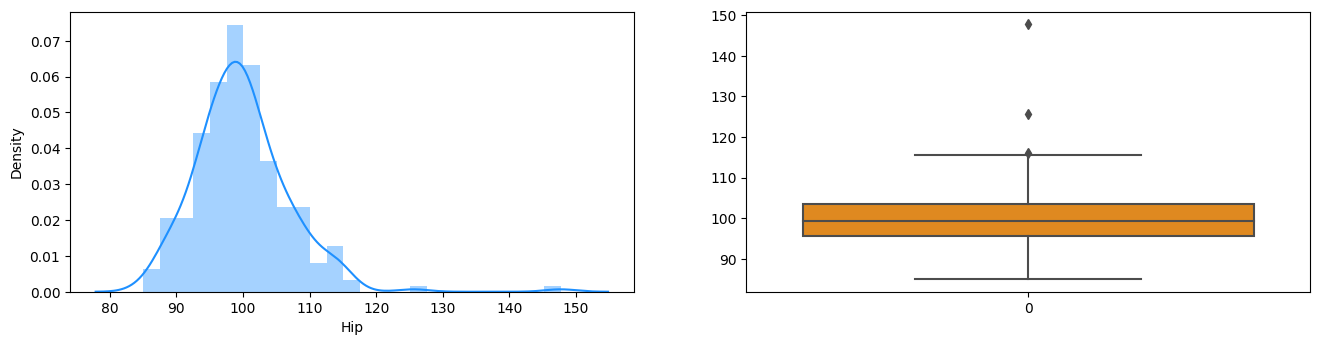

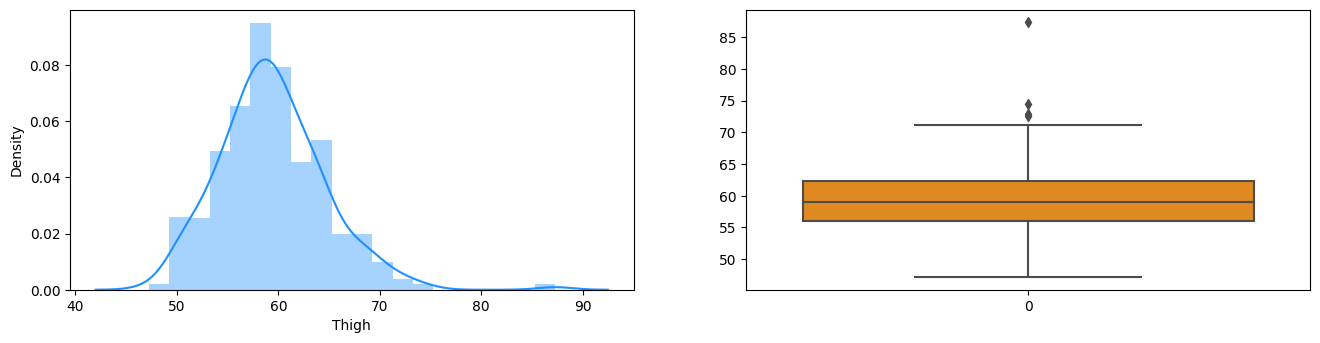

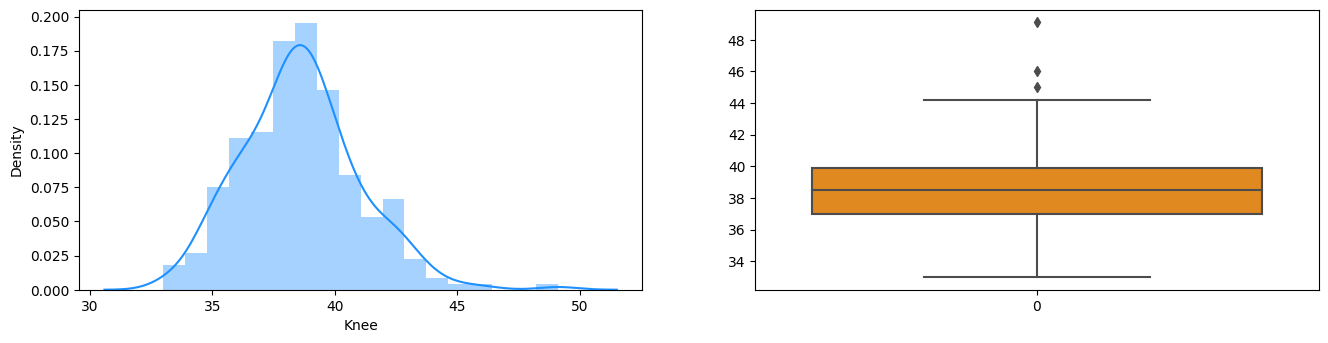

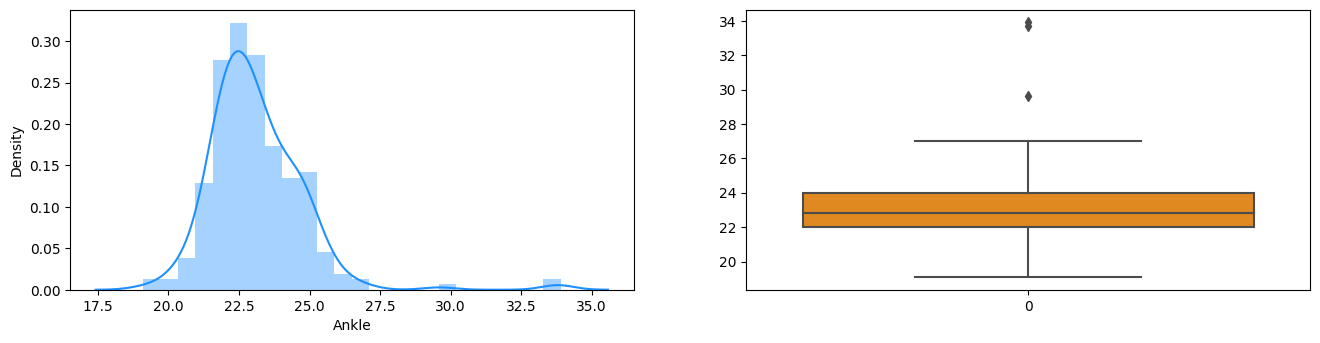

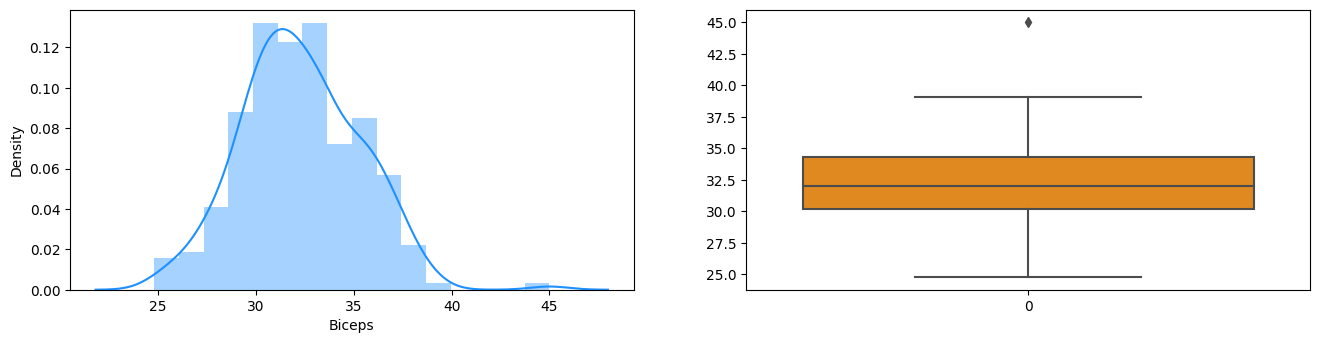

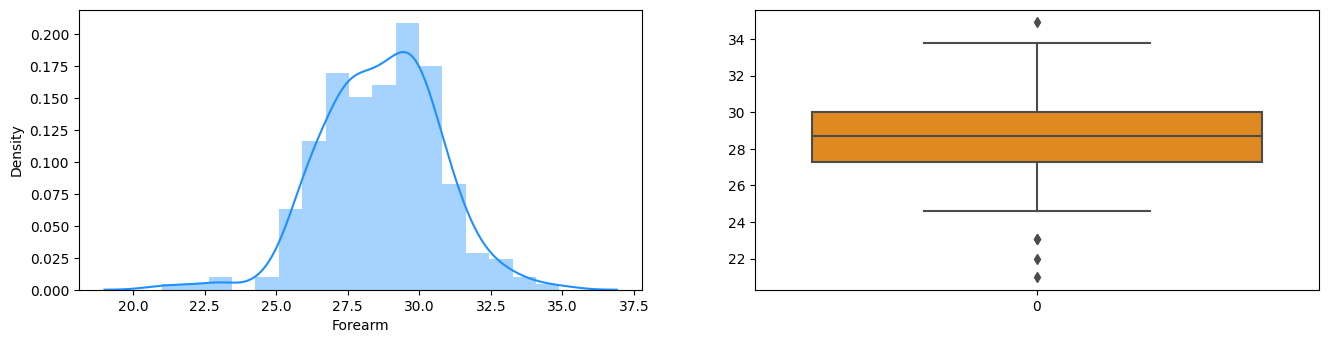

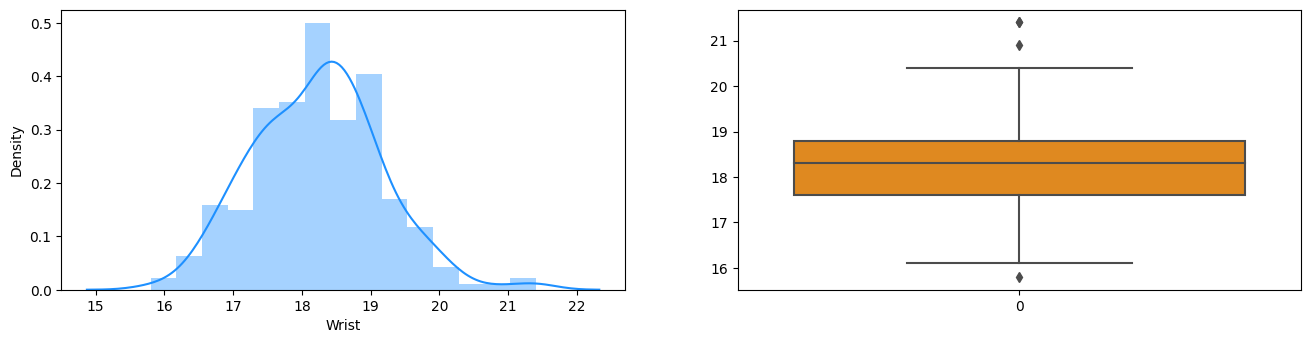

In [14]:
for i in columns:
  plt.figure(figsize=(16,8))
  plt.subplot(2,2,1)
  sns.distplot(df[i],color='dodgerblue' )
  plt.subplot(2,2,2)
  sns.boxplot(df[i],color='darkorange' )

In [15]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64




*   It is observerd from the box plot that there are outliers in all the columns
*   It is clear that some of the input columns are skewed

So removing the outlier is essential





#Checking of the columns are Correlated

<Axes: >

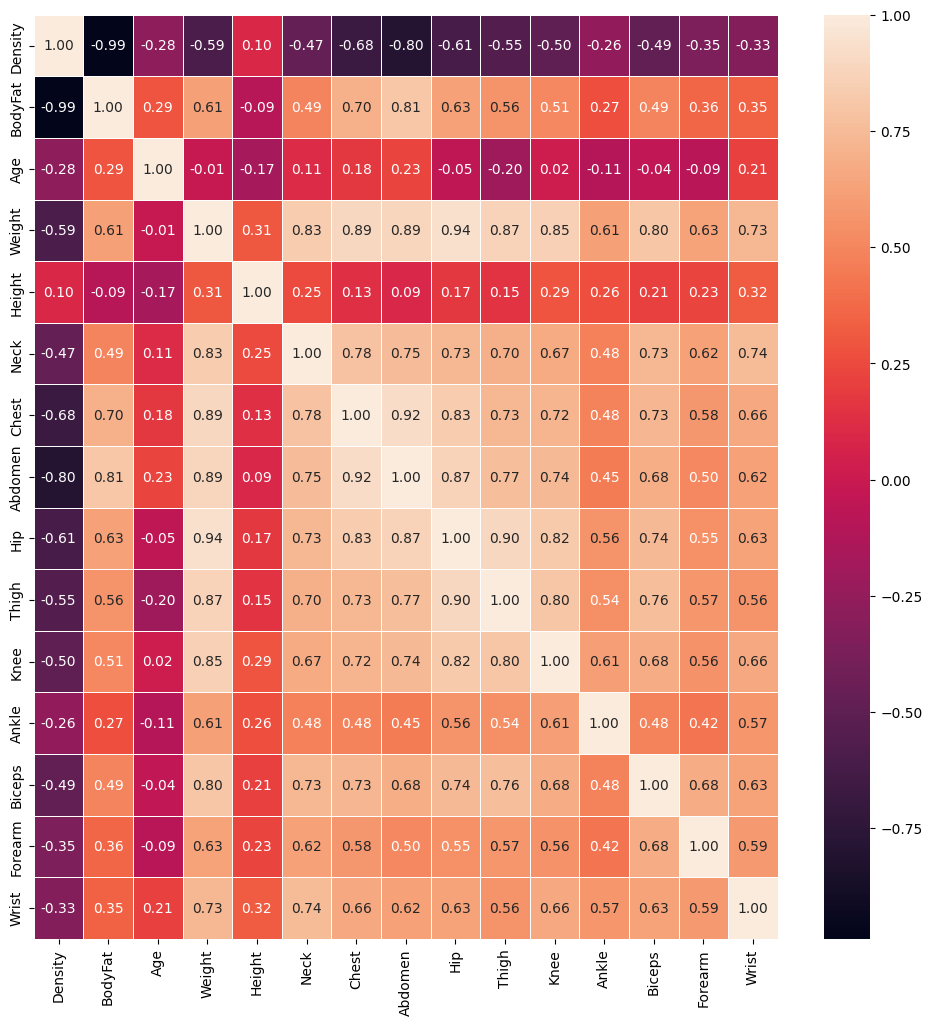

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

#Feature engineering

In [43]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['BodyFat']

In [44]:
X['Bmi']=703*X['Weight']/(X['Height']*X['Height'])
X.head()


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [45]:
X['ACratio'] = X['Abdomen']/X['Chest']
X['HTratio'] = X['Hip']/X['Thigh']
X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X.head()


,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342


In [46]:
import statsmodels.api as sm
import scipy.stats as stats
z = np.abs(stats.zscore(X))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]
#find how many rows are left in the dataframe 
X_clean.shape


(242, 10)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

In [48]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)


X_train: (181, 10)
X_test: (61, 10)
Y_train: (181,)
Y_test: (61,)


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression object
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict using the trained model
y_prediction = rf.predict(X_test)


In [50]:
rf.score(X_train, y_train)
     
rf.score(X_test, y_test)

0.5832391482792773

In [51]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_prediction)
print("Mean absolute error",mae)



Mean absolute error 4.703196721311474


In [52]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y_test, y_prediction)
print("Mean squared error",mse)

Mean squared error 31.66643257377048


In [53]:
# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

Root mean squared error 5.627293538973285


In [54]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_prediction)
print("R2 Score",r2)


R2 Score 0.5832391482792773


#Predicting with custom input

In [55]:
custom_input = np.array([[23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695]])  


In [56]:
predicted_value = rf.predict(custom_input)


In [57]:
print(predicted_value)

[14.355]
